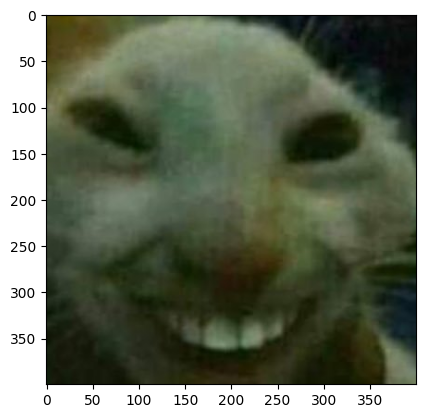

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

# Load the image
img = Image.open('kot.png')

# Display the image
plt.imshow(img)
plt.show()

In [2]:
# Convert the image to a numpy array
imga_array = np.array(img)
img_array = np.copy(imga_array)

#save image size
img_size = img_array.shape

#choose the brightness value to be added from the range of 1-255
brightness = random.randint(1, 255)
print("Brightness value: ", brightness)

#choose number of pixels to be modified
num_pixels = random.randint(1, 1000)
print("Number of pixels to be modified: ", num_pixels)

#generate seed for random number generator
seed = random.randint(1, 1000)
print("Seed: ", seed)

#generate random number generator
rng = np.random.default_rng(seed)

#initiate Sn values
S_org = 0
S_mod = 0
S_dec = 0

for i in range(num_pixels):
    #choose two pixels to be modified using random generator
    x1 = rng.integers(0, img_size[0])
    y1 = rng.integers(0, img_size[1])

    x2 = rng.integers(0, img_size[0])
    y2 = rng.integers(0, img_size[1])

    #add brightness to the first pixel green value
    img_array[x1, y1][1] = (img_array[x1, y1][1] + brightness) % 256

    #decrease brightness from the second pixel green value
    if(brightness > img_array[x2, y2][1]):
        temp = brightness - img_array[x2, y2][1]
        img_array[x2, y2][1] = 255 - temp
    else:
        img_array[x2, y2][1] = img_array[x2, y2][1] - brightness

    S_org += (imga_array[x1, y1][1] - imga_array[x2, y2][1])
    S_mod += (img_array[x1, y1][1] - img_array[x2, y2][1])

#convert the numpy array back to image
img = Image.fromarray(img_array)

#print S values
print("S_org: ", S_org)
print("S_mod: ", S_mod)

Brightness value:  214
Number of pixels to be modified:  511
Seed:  522
S_org:  64900
S_mod:  82391


C:\Users\rtoit\AppData\Local\Temp\ipykernel_16564\420740415.py:47: RuntimeWarning: overflow encountered in scalar subtract
  S_mod += (img_array[x1, y1][1] - img_array[x2, y2][1])
C:\Users\rtoit\AppData\Local\Temp\ipykernel_16564\420740415.py:46: RuntimeWarning: overflow encountered in scalar subtract
  S_org += (imga_array[x1, y1][1] - imga_array[x2, y2][1])


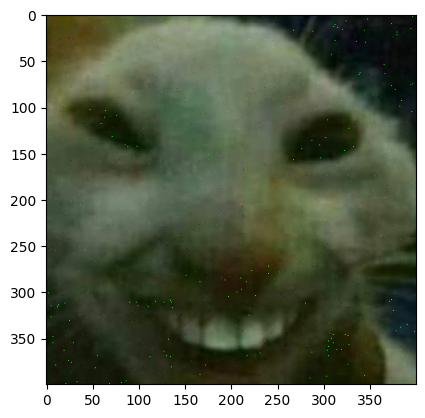

In [3]:
#display the modified image
plt.imshow(img)
plt.show()

In [4]:
#initialte random number generator with the same seed
rng = np.random.default_rng(seed)

#modify the image back to original
for i in range(num_pixels):
    #choose two pixels to be modified using random generator
    x1 = rng.integers(0, img_size[0])
    y1 = rng.integers(0, img_size[1])

    x2 = rng.integers(0, img_size[0])
    y2 = rng.integers(0, img_size[1])

    #add brightness to the first pixel green value
    img_array[x2, y2][1] = (img_array[x2, y2][1] + brightness) % 256

    #decrease brightness from the second pixel green value
    if(brightness > img_array[x1, y1][1]):
        temp = brightness - img_array[x1, y1][1]
        img_array[x1, y1][1] = 255 - temp
    else:
        img_array[x1, y1][1] = img_array[x1, y1][1] - brightness

    S_dec += (imga_array[x1, y1][1] - imga_array[x2, y2][1])

#print S value
print("S_dec: ", S_dec)
print("S_org: ", S_org)

S_dec:  64900
S_org:  64900


C:\Users\rtoit\AppData\Local\Temp\ipykernel_16564\2168436050.py:23: RuntimeWarning: overflow encountered in scalar subtract
  S_dec += (imga_array[x1, y1][1] - imga_array[x2, y2][1])
